In [71]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [72]:
def newton_interpolation(point, x_list, y_list):   
    arranged_list = []
    for i in range(len(x_list)):
        temp_list = [y_list[i], x_list[i], x_list[i]]
        arranged_list.append(temp_list)

    wanted_values = []
    new_arranged_list = []
    while(len(arranged_list) >= 1):
        wanted_values.append(arranged_list[0][0])
        for i in range(1, int(len(arranged_list))):
            x_indexes = [arranged_list[i-1][1], arranged_list[i-1][2],
                         arranged_list[i][1], arranged_list[i][2]]
            new_x1 = min(x_indexes)
            new_x2 = max(x_indexes)

            top = arranged_list[i][0] - arranged_list[i-1][0]
            low = new_x2 - new_x1

            if low != 0:
                val = top / low
        
            new_arg = [val, new_x1, new_x2]
            new_arranged_list.append(new_arg)

            x_indexes = []
     
        arranged_list = new_arranged_list
        new_arranged_list=[]

    #print("Important values:", wanted_values)
    approximate = wanted_values[0]
    for i in range(1, len(wanted_values)):
        will_mult = 1
        for j in range(i):
            will_mult *= (point - x_list[j])
        
        approximate += wanted_values[i] * will_mult
    
    return approximate

In [73]:
x_list = [-5, -1, 0, 2]
y_list = [-2, 6, 1, 3]
point = 1

result = newton_interpolation(point, x_list, y_list)
print(result)

-0.9714285714285689


Time: 0.5553381443023682


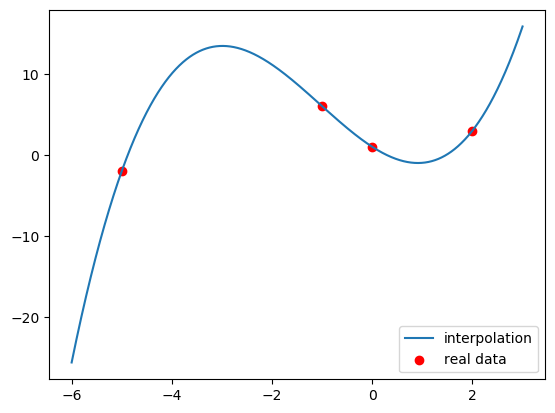

In [74]:
xx = np.arange(min(x_list)-1, max(x_list)+1, 0.0001)
yy = list()

start = time.time()
for x in xx:
    yy.append(newton_interpolation(x, x_list, y_list))
end = time.time()
print("Time:", end - start)

plt.scatter(x_list, y_list, color="red", label="real data")
plt.plot(xx, yy, label="interpolation")
plt.legend()
plt.show()